# Comprehensive Data Science Workflow: Normal Distribution, Naive Bayes, Regression Analysis, and ROC Curve

## Introduction

In this notebook, we will cover the application of the Gaussian Naive Bayes algorithm for classification and its evaluation using the ROC curve. We will use the Wine Quality Dataset for this purpose. The dataset provides various chemical properties of wine, which will be used as features to predict the quality of wine. Let's dive into the details of the model and the evaluation process!

## Naive Bayes

The Naive Bayes algorithm is a probabilistic classifier based on Bayes' theorem. It assumes that the features are conditionally independent given the class label, which simplifies the computation. Despite its simplicity, Naive Bayes can perform surprisingly well in many real-world tasks, especially when the independence assumption holds reasonably true.

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Wine Quality Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, delimiter=';')

# Separate features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Binarize the target variable (quality >= 7 is considered good wine)
y = (y >= 7).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train and Evaluate the Model
Next, we will train a Gaussian Naive Bayes model and predict the probabilities on the test set.

In [8]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict the probabilities
y_probs = gnb.predict_proba(X_test)[:, 1]
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


## ROC Curve
The ROC (Receiver Operating Characteristic) curve is a graphical representation of a classifier's performance. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The area under the curve (AUC) provides a single scalar value to compare classifiers. A higher AUC indicates a better-performing model.

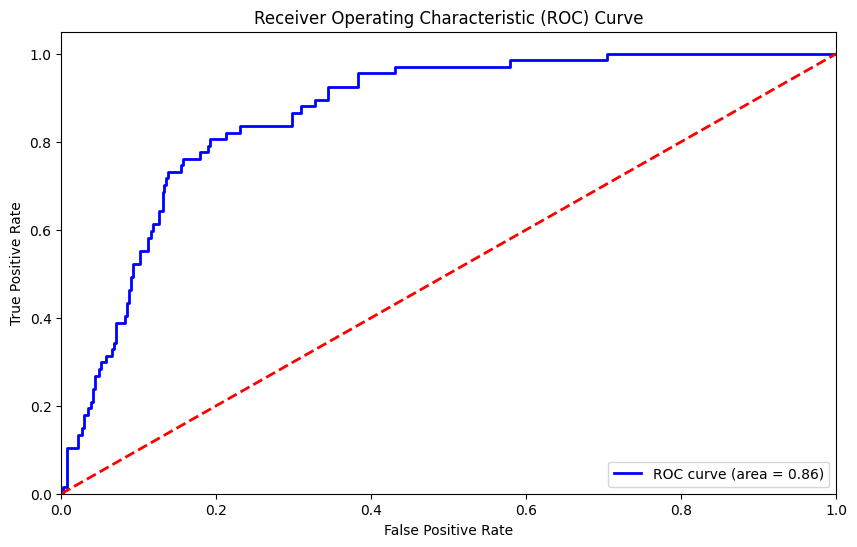

In [9]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Learning Curves
Learning curves show the training and validation scores of a model for varying sizes of the training dataset. They provide insights into the performance, helping to diagnose bias or variance problems.

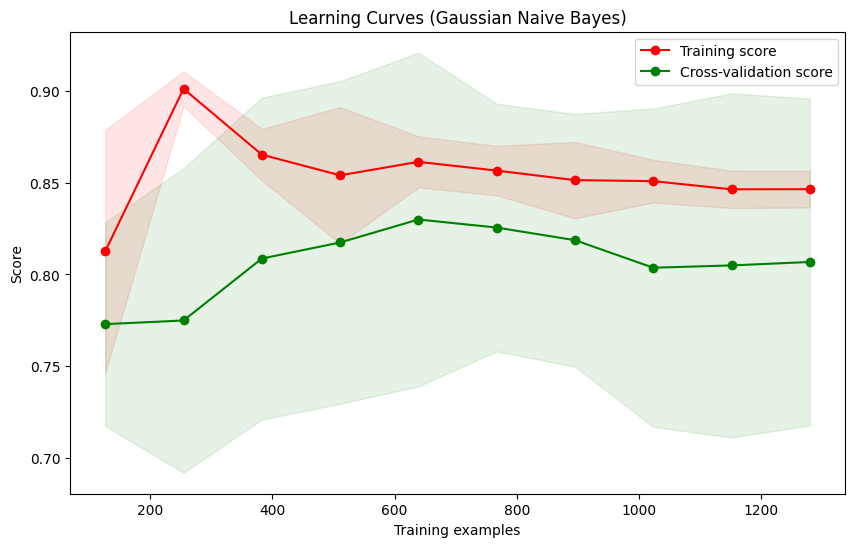

In [10]:
# Import necessary libraries
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(gnb, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves (Gaussian Naive Bayes)')
plt.legend(loc='best')
plt.show()


## Conclusion
In this notebook, we demonstrated the use of the Gaussian Naive Bayes algorithm on the Wine Quality Dataset. We prepared the data, trained the model, and evaluated its performance using accuracy, ROC curve, and AUC. Additionally, we plotted learning curves to gain insights into the model's performance over varying training sizes. The Gaussian Naive Bayes algorithm, despite its simplicity and strong assumptions, can be an effective classifier in many practical applications. The ROC curve and learning curves provide valuable tools for evaluating and understanding the behavior of classification models.